In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root = os.path.join(os.getenv("DATASETS_ROOT", "/default/path/to/datasets"), "MOSAIC")
#load train and test jsons
with open(os.path.join(root, 'train_naturalistic.json'), 'r') as f:
    train_val_naturalistic_all = json.load(f)
with open(os.path.join(root, 'test_naturalistic.json'), 'r') as f:
    test_naturalistic_all = json.load(f)
with open(os.path.join(root, 'test_artificial.json'), 'r') as f:
    test_artificial_all = json.load(f)

In [3]:
#get counts for global train and test stim and reps
total_train_naturalistic_stimuli = set()
for filename_dict in train_val_naturalistic_all:
    for index_name, responses in filename_dict.items():
        subject_dataset, filename = index_name.split('_stimulus-')
        subject, dset = subject_dataset.split('_')
        if filename not in total_train_naturalistic_stimuli:
            total_train_naturalistic_stimuli.add(filename)

total_test_naturalistic_stimuli = set()
for filename_dict in test_naturalistic_all:
    for index_name, responses in filename_dict.items():
        subject_dataset, filename = index_name.split('_stimulus-')
        subject, dset = subject_dataset.split('_')
        if filename not in total_test_naturalistic_stimuli:
            total_test_naturalistic_stimuli.add(filename)

total_test_artificial_stimuli = set()
for filename_dict in test_artificial_all:
    for index_name, responses in filename_dict.items():
        subject_dataset, filename = index_name.split('_stimulus-')
        subject, dset = subject_dataset.split('_')
        if filename not in total_test_artificial_stimuli:
            total_test_artificial_stimuli.add(filename)


In [4]:
#print the number of test and train reps and stim for each of the 8 datasets and across all datasets
datasets = ["BOLD5000", "BMD", "NSD", "GOD", "NOD", "HAD", "THINGS", "deeprecon"]
results = {dset: {'naturalistic_train_stim': 0, 'naturalistic_test_stim': 0, 'artificial_test_stim':0,
                'naturalistic_train_reps': 0, 'naturalistic_test_reps': 0, 'artificial_test_reps': 0} for dset in datasets}

total_train_naturalistic_stimuli = set()
for dataset in datasets:
    unique_in_dataset = set()
    for filename_dict in train_val_naturalistic_all:
        for index_name, responses in filename_dict.items():
            subject_dataset, filename = index_name.split('_stimulus-')
            subject, dset = subject_dataset.split('_')
            if dataset == dset:
                if filename not in total_train_naturalistic_stimuli:
                    total_train_naturalistic_stimuli.add(filename)
                if filename not in unique_in_dataset:
                    unique_in_dataset.add(filename)
                    results[dataset]['naturalistic_train_stim'] += 1
                results[dataset]['naturalistic_train_reps'] += len(responses)

total_test_naturalistic_stimuli = set()
for dataset in datasets:
    unique_in_dataset = set()
    for filename_dict in test_naturalistic_all:
        for index_name, responses in filename_dict.items():
            subject_dataset, filename = index_name.split('_stimulus-')
            subject, dset = subject_dataset.split('_')
            if dataset == dset:
                if filename not in total_test_naturalistic_stimuli:
                    total_test_naturalistic_stimuli.add(filename)
                if filename not in unique_in_dataset:
                    unique_in_dataset.add(filename)
                    results[dataset]['naturalistic_test_stim'] += 1
                results[dataset]['naturalistic_test_reps'] += len(responses)

total_test_artificial_stimuli = set()
for dataset in datasets:
    unique_in_dataset = set()
    for filename_dict in test_artificial_all:
        for index_name, responses in filename_dict.items():
            subject_dataset, filename = index_name.split('_stimulus-')
            subject, dset = subject_dataset.split('_')
            if dataset == dset:
                if filename not in total_test_artificial_stimuli:
                    total_test_artificial_stimuli.add(filename)
                if filename not in unique_in_dataset:
                    unique_in_dataset.add(filename)
                    results[dataset]['artificial_test_stim'] += 1
                results[dataset]['artificial_test_reps'] += len(responses)

In [6]:
print("*"*20)
print("Total test/train set stats.")
print(f"Number of naturalistic training stimuli: {len(total_train_naturalistic_stimuli)}")
print(f"Number of naturalistic testing stimuli: {len(total_test_naturalistic_stimuli)}")
print(f"Number of artificial testing stimuli: {len(total_test_artificial_stimuli)}")
print(f"Number of naturalistic training reps: {sum([value['naturalistic_train_reps'] for _, value in results.items()])}")  
print(f"Number of naturalistic testing reps: {sum([value['naturalistic_test_reps'] for _, value in results.items()])}")  
print(f"Number of artificial testing reps: {sum([value['artificial_test_reps'] for _, value in results.items()])}")  

for dset, value in results.items():
    print(dset)
    print(f"Number of naturalistic train stim: {value['naturalistic_train_stim']}")
    print(f"Number of naturalistic test stim: {value['naturalistic_test_stim']}")
    print(f"Number of artificial test stim: {value['artificial_test_stim']}")
    print(f"Number of naturalistic train reps: {value['naturalistic_train_reps']}")
    print(f"Number of naturalistic test reps: {value['naturalistic_test_reps']}")
    print(f"Number of artificial test reps: {value['artificial_test_reps']}")

********************
Total test/train set stats.
Number of naturalistic training stimuli: 144360
Number of naturalistic testing stimuli: 18145
Number of artificial testing stimuli: 334
Number of naturalistic training reps: 353924
Number of naturalistic testing reps: 68011
Number of artificial testing reps: 8072
BOLD5000
Number of naturalistic train stim: 3761
Number of naturalistic test stim: 113
Number of artificial test stim: 0
Number of naturalistic train reps: 13508
Number of naturalistic test reps: 1615
Number of artificial test reps: 0
BMD
Number of naturalistic train stim: 994
Number of naturalistic test stim: 102
Number of artificial test stim: 0
Number of naturalistic train reps: 29820
Number of naturalistic test reps: 10200
Number of artificial test reps: 0
NSD
Number of naturalistic train stim: 69117
Number of naturalistic test stim: 1000
Number of artificial test stim: 284
Number of naturalistic train reps: 190649
Number of naturalistic test reps: 21118
Number of artificial

In [7]:
if (total_train_naturalistic_stimuli.isdisjoint(total_test_naturalistic_stimuli) and
       total_train_naturalistic_stimuli.isdisjoint(total_test_artificial_stimuli) and 
       total_test_naturalistic_stimuli.isdisjoint(total_test_artificial_stimuli)):
    print("No stimuli overlap between naturalistic train, naturalistic test, and artificial test sets.")
else:
    raise ValueError("Found overlap between naturalistic train, naturalistic test, and artificial test sets")

No stimuli overlap between naturalistic train, naturalistic test, and artificial test sets.


### Create a pie chart

In [8]:
#housekeeping
ext_list = ['png','svg']
save_flag=True
filename_core = f"testtrain_stats_piechart"
if save_flag:
    save_root = os.path.join(os.getenv("PROJECT_ROOT"), "src", "stimulusSetPreparation", "compile_datasets", "output")
    if not os.path.exists(save_root):
        print(f"creating output directory: {save_root}")
        os.makedirs(save_root)

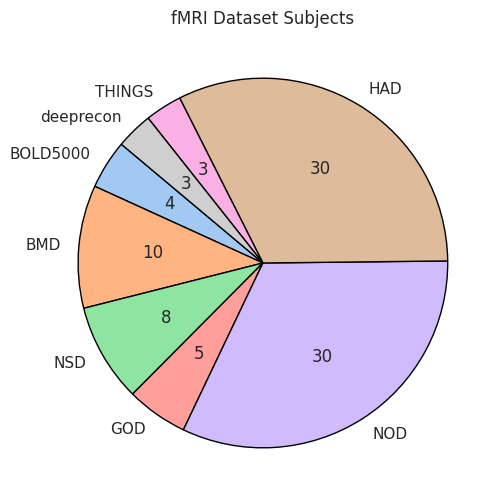

In [9]:
# Apply Seaborn's style
sns.set_theme()

# Example data
labels = ["BOLD5000", "BMD", "NSD", "GOD", "NOD", "HAD", "THINGS", "deeprecon"]
nsubjects = [4, 10, 8, 5, 30, 30, 3, 3] 
colors = sns.color_palette('pastel')[0:len(labels)]  # Using a pastel color palette from Seaborn

def absolute_value(val):
    total = sum(nsubjects)
    absolute = round(total * val / 100)
    return f"{absolute}"

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(nsubjects, labels=labels, colors=colors, autopct=absolute_value, startangle=140, wedgeprops={'edgecolor': 'black'})

# Adding a title
plt.title("fMRI Dataset Subjects")
if save_flag:
    for ext in ext_list:
        if ext == 'png':
            plt.savefig(os.path.join(save_root, f"{filename_core}_subjects.{ext}"), dpi=300)
        else:
            plt.savefig(os.path.join(save_root, f"{filename_core}_subjects.{ext}"))
plt.show()

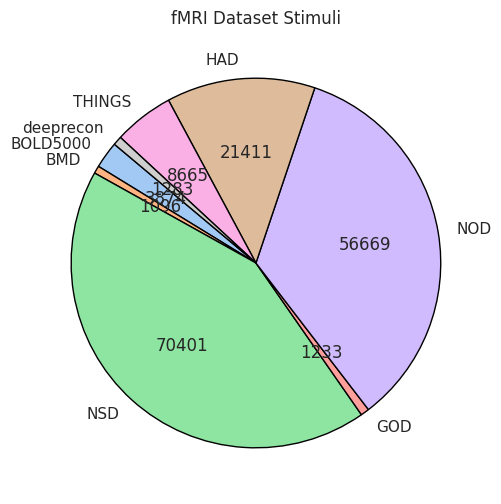

In [10]:
# Apply Seaborn's style
sns.set_theme()

# Example data
labels = ["BOLD5000", "BMD", "NSD", "GOD", "NOD", "HAD", "THINGS", "deeprecon"]
nstimuli = [results[dset]['naturalistic_train_stim'] + results[dset]['naturalistic_test_stim'] + results[dset]['artificial_test_stim'] for dset in labels]
colors = sns.color_palette('pastel')[0:len(labels)]  # Using a pastel color palette from Seaborn

def absolute_value(val):
    total = sum(nstimuli)
    absolute = round(total * val / 100)
    return f"{absolute}"

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(nstimuli, labels=labels, colors=colors, autopct=absolute_value, startangle=140, wedgeprops={'edgecolor': 'black'})

# Adding a title
plt.title("fMRI Dataset Stimuli")
if save_flag:
    for ext in ext_list:
        if ext == 'png':
            plt.savefig(os.path.join(save_root, f"{filename_core}_stimuli.{ext}"), dpi=300)
        else:
            plt.savefig(os.path.join(save_root, f"{filename_core}_stimuli.{ext}"))
plt.show()

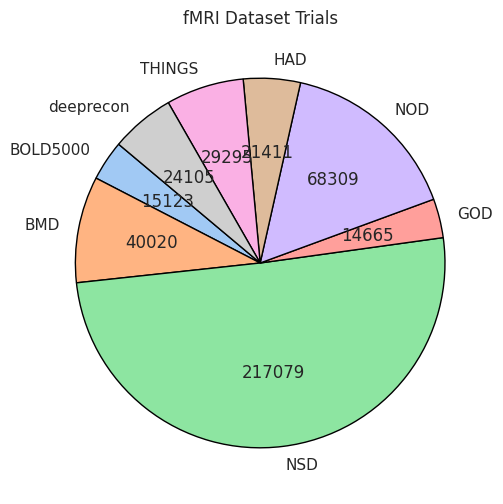

In [11]:
# Apply Seaborn's style
sns.set_theme()

# Example data
labels = ["BOLD5000", "BMD", "NSD", "GOD", "NOD", "HAD", "THINGS", "deeprecon"]
nresponses = [results[dset]['naturalistic_train_reps'] + results[dset]['naturalistic_test_reps'] + results[dset]['artificial_test_reps'] for dset in labels]  # Percentages for each category
colors = sns.color_palette('pastel')[0:len(labels)]  # Using a pastel color palette from Seaborn

def absolute_value(val):
    total = sum(nresponses)
    absolute = round(total * val / 100)
    return f"{absolute}"

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(nresponses, labels=labels, colors=colors, autopct=absolute_value, startangle=140, wedgeprops={'edgecolor': 'black'})

# Adding a title
plt.title("fMRI Dataset Trials")
if save_flag:
    for ext in ext_list:
        if ext == 'png':
            plt.savefig(os.path.join(save_root, f"{filename_core}_trials.{ext}"), dpi=300)
        else:
            plt.savefig(os.path.join(save_root, f"{filename_core}_trials.{ext}"))
plt.show()